<a href="https://colab.research.google.com/github/sidchaubey/Machine-Hack-Hackathons/blob/master/Usecase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import pandas as pd
import numpy as np
!pip install sweetviz
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [186]:
data = pd.read_excel("/UseCase.xlsx",sheet_name="Case Study 2020")
data

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3.0,3.0,3.0,1.0,4.0,3.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0,0.0,0
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0,0.0,1
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2.0,5.0,1.0,5.0,2.0,1.0,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0,0.0,0
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0,0.0,1


In [187]:
my_report = sv.analyze(data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:46  -> (00:00 left)


Creating Associations graph... DONE!


In [188]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [189]:
data.shape

(129880, 24)

In [190]:
data.columns

Index(['Customer ID', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [191]:
data.isna().sum()

Customer ID                            0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  4
Departure/Arrival time convenient      4
Ease of Online booking                 3
Gate location                          8
Food and drink                         5
Online boarding                        6
Seat comfort                           1
Inflight entertainment                 4
On-board service                       3
Leg room service                       2
Baggage handling                       2
Checkin service                        3
Inflight service                       1
Cleanliness                            2
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [192]:
data.satisfaction.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [193]:
data["Inflight wifi service"].value_counts()

2.0    32318
3.0    32185
4.0    24775
1.0    22327
5.0    14355
0.0     3916
Name: Inflight wifi service, dtype: int64

In [194]:
data["Arrival Delay in Minutes"].value_counts()

0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
555.0        1
920.0        1
444.0        1
952.0        1
717.0        1
Name: Arrival Delay in Minutes, Length: 472, dtype: int64

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129876 non-null  float64
 8   Departure/Arrival time convenient  129876 non-null  float64
 9   Ease of Online booking             129877 non-null  float64
 10  Gate location                      129872 non-null  float64
 11  Food and drink                     1298

In [196]:
data[data.isna().any(1)].head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,NaN,4.0,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,3.0,5.0,2.0,9,23.0,0
11,51412,Female,Loyal Customer,12,Personal Travel,Eco Plus,308,2.0,4.0,2.0,2.0,NaN,2.0,1.0,1.0,1.0,2.0,5.0,5.0,5.0,1.0,0,0.0,0
14,95789,Female,Loyal Customer,26,Personal Travel,Eco,453,3.0,NaN,3.0,2.0,2.0,3.0,2.0,2.0,4.0,3.0,2.0,2.0,1.0,2.0,43,35.0,0
15,100580,Male,disloyal Customer,13,Business travel,Eco,486,NaN,1.0,2.0,3.0,4.0,2.0,1.0,4.0,2.0,1.0,4.0,1.0,3.0,4.0,1,0.0,0
17,127461,Male,Loyal Customer,41,Business travel,Business,2075,4.0,4.0,2.0,NaN,4.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0,10.0,1


In [197]:
# data["Inflight entertainment"].median()
for i in null_columns:
  print(data[i].median())
  print(data[i].mode()[0])
  print(" ")
  print(" ")
  print(" ")

In [198]:
null_columns = [] # To store columns containing null values 

for i in data.columns:
  if data[i].isna().any() == True:
    null_columns.append(i)

print(null_columns)

for i in null_columns:
  data[i].fillna(data[i].mode()[0], inplace=True)
  # data[i].fillna(data[i].median(), inplace=True)

  



['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Arrival Delay in Minutes']


###### Note: 
The above code replaces the nan values with mode as the data contains ordinal data columns(Eg:'Inflight wifi service') replacing it with median will mean that we're assuming the order of preference whereas in case of mean would result in another category itself hence seeing this conditition I prefered using mode as mode is also not affected ny outlier.

In [199]:
data.isna().sum()

Customer ID                          0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [200]:
data.iloc[6] # Verifying whether values are properly replaced

Customer ID                                    82113
Gender                                          Male
Customer Type                         Loyal Customer
Age                                               47
Type of Travel                       Personal Travel
Class                                            Eco
Flight Distance                                 1276
Inflight wifi service                              2
Departure/Arrival time convenient                  4
Ease of Online booking                             2
Gate location                                      3
Food and drink                                     2
Online boarding                                    2
Seat comfort                                       2
Inflight entertainment                             2
On-board service                                   3
Leg room service                                   3
Baggage handling                                   4
Checkin service                               

<Figure size 2000x2000 with 0 Axes>

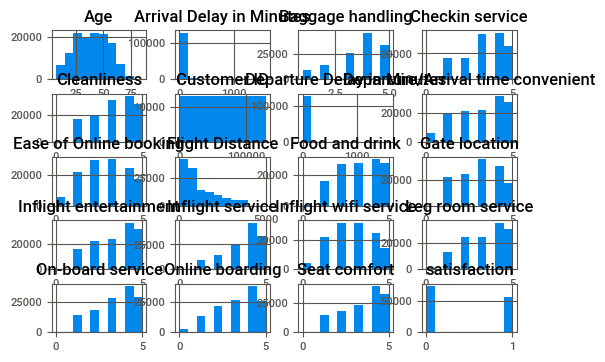

In [201]:
plt.figure(figsize=(20,20))
data.hist();
plt.show();

# Checking For Outlier in data and converting it

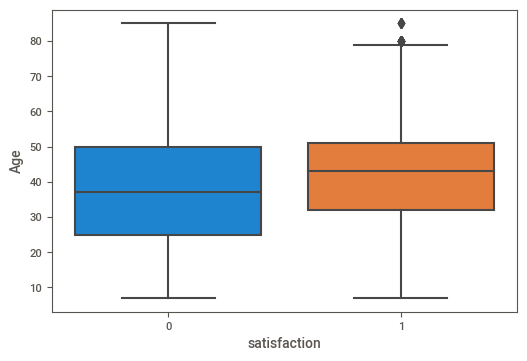

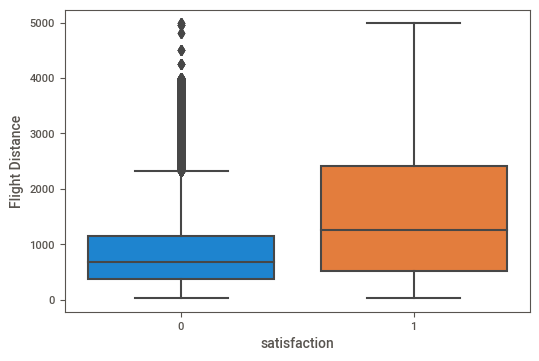

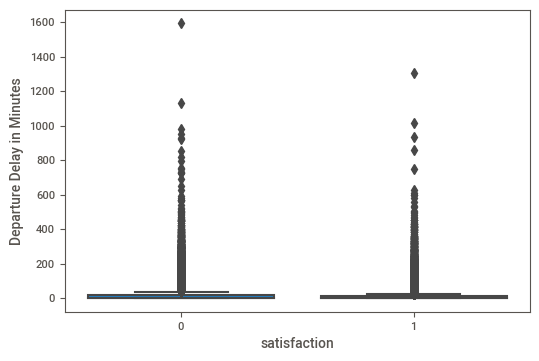

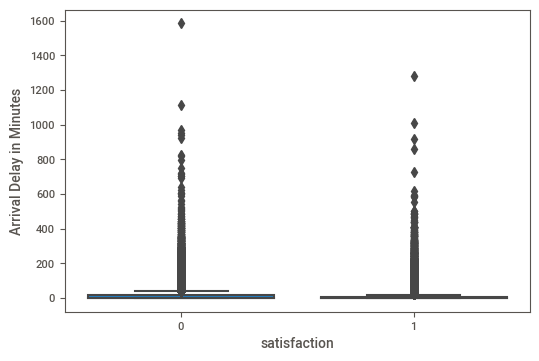

In [202]:
continous_data = data[["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]

for i in continous_data.columns:
  # sns.catplot(x="satisfaction", y = i, kind="boxen", data=data)
  sns.boxplot(x="satisfaction", y = i, data=data)
  plt.show()

In [203]:
continous_data.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,25,18.0
1,25,235,1,6.0
2,26,1142,0,0.0
3,25,562,11,9.0
4,61,214,0,0.0


In [204]:
standardScalerX = StandardScaler()
standardized_data = standardScalerX.fit_transform(continous_data)

In [205]:
standardized_dataFrame = pd.DataFrame(data=standardized_data, columns=["Age", "Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"])
standardized_dataFrame

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.747961,-0.732184,0.270187,0.076909
1,-0.954274,-0.957760,-0.360214,-0.235460
2,-0.888133,-0.048440,-0.386481,-0.391644
3,-0.954274,-0.629924,-0.097547,-0.157368
4,1.426788,-0.978814,-0.386481,-0.391644
...,...,...,...,...
129875,-0.359008,-0.666016,-0.386481,-0.391644
129876,-1.086555,-0.545709,-0.386481,-0.391644
129877,-1.483399,-0.363243,-0.386481,-0.391644
129878,-1.681821,-0.063478,-0.386481,-0.391644


Used Standard Scalar to remove  outlier as after standard scalar the distribution is made such that the mean of each column is 0 and standard deviation is 1. 

In [206]:
data[["Age", "Flight Distance","Departure Delay in Minutes", "Arrival Delay in Minutes"]] = standardized_dataFrame

In [207]:
object_col = []
for i in list(data.columns):
  if data[i].dtype == "O":
    object_col.append(i)

for i in object_col:
  print(data[i].value_counts())
  print(" ")
  print(" ")

Female    65899
Male      63981
Name: Gender, dtype: int64
 
 
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
 
 
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
 
 
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
 
 


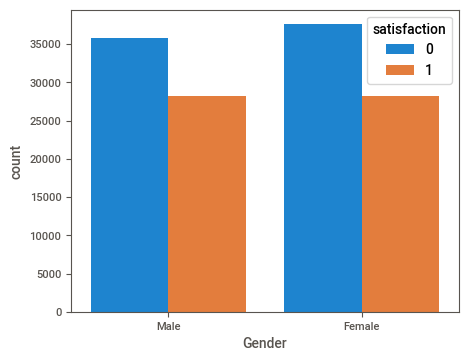

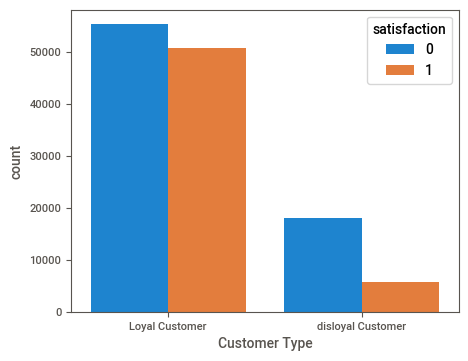

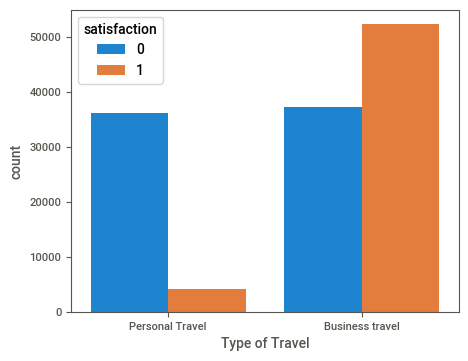

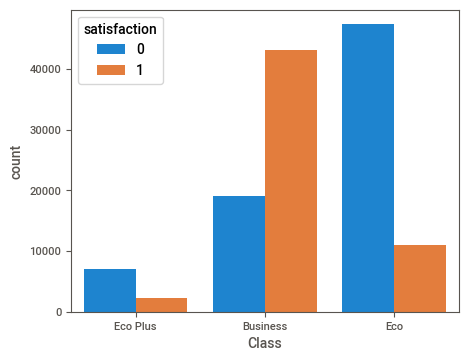

In [208]:
for i in object_col:
  plt.figure(figsize=(5,4))
  sns.countplot(data=data,x=i,hue='satisfaction');
  plt.show()


#### Insights:
1. In case of Gender does not have significant effect on the satisfication of a person
2. Personal Traveller tends to be less satisfied.
3. Business class passenger are mostly satisfied with the facilities whereas we need to improve the quality of provision in Economy class as they are highly Not-Satisfied with the facility provides

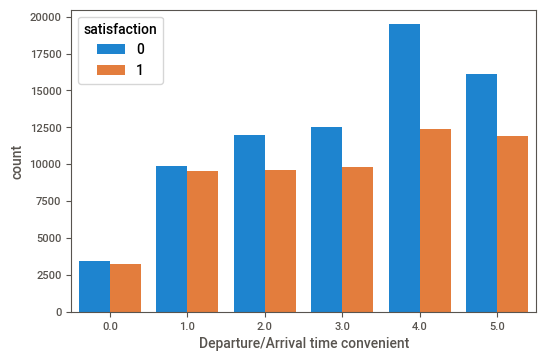

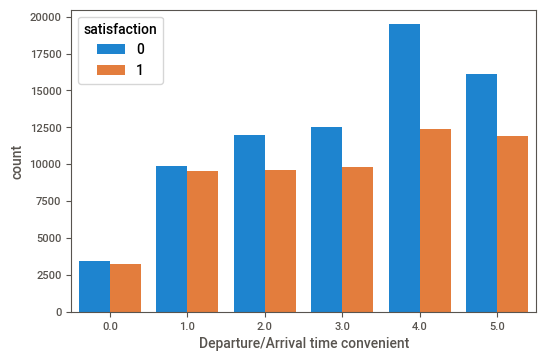

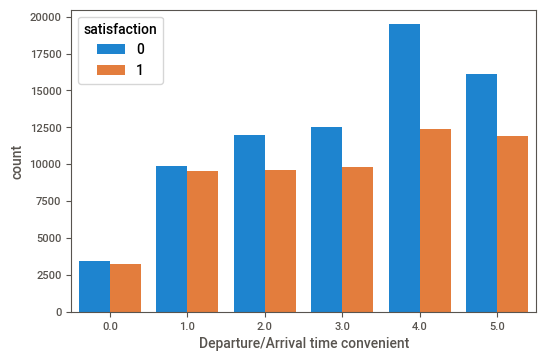

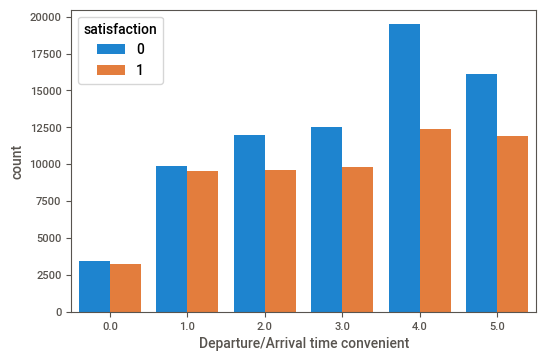

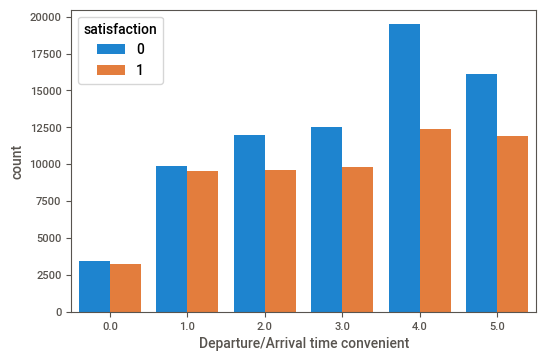

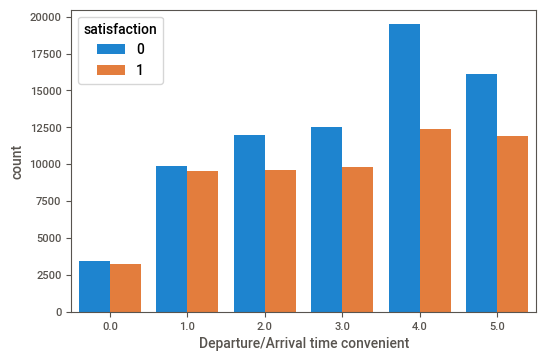

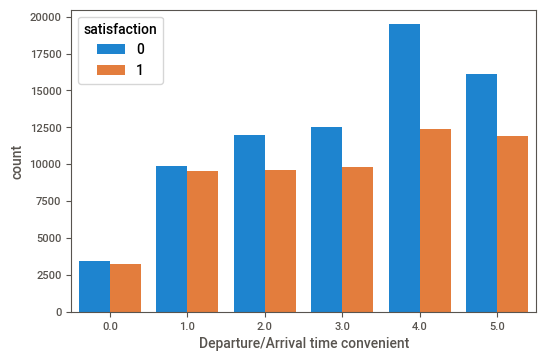

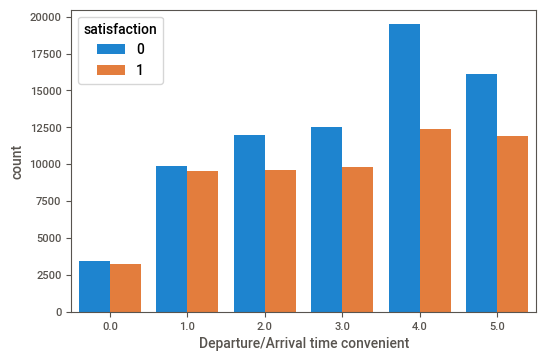

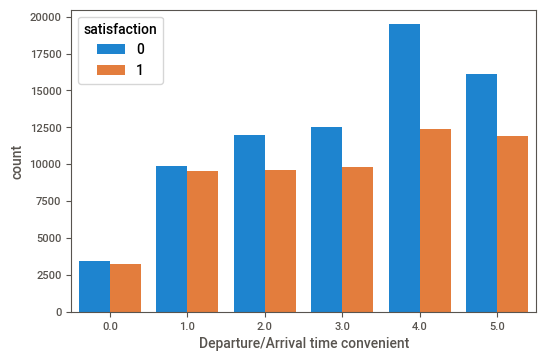

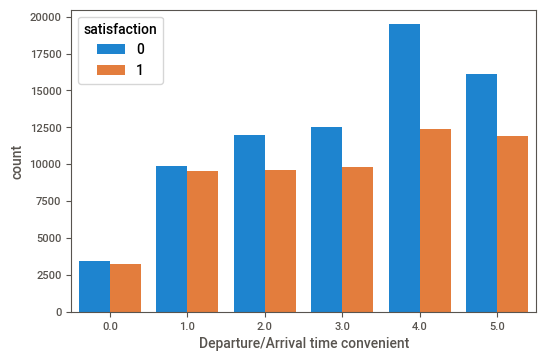

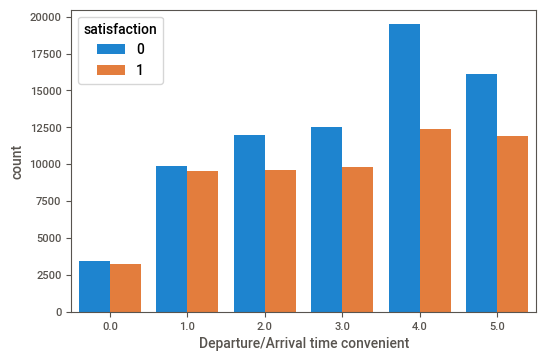

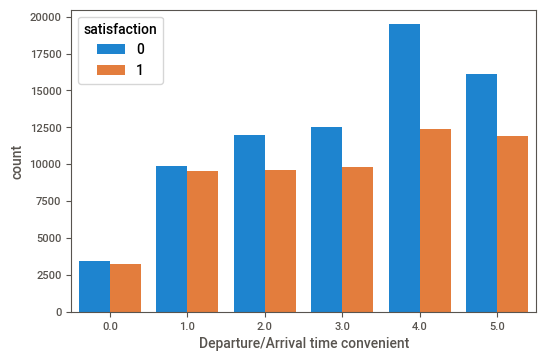

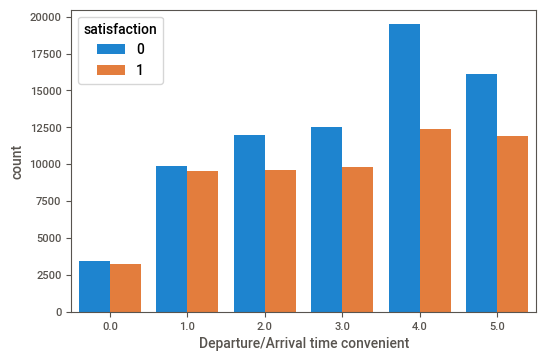

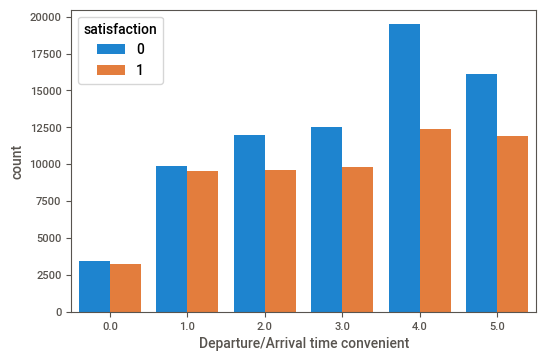

In [209]:
ordinal_columns = list(data.iloc[:,7:21].columns)

for i in ordinal_columns:
  sns.countplot(data=data,x="Departure/Arrival time convenient",hue='satisfaction');
  plt.show()

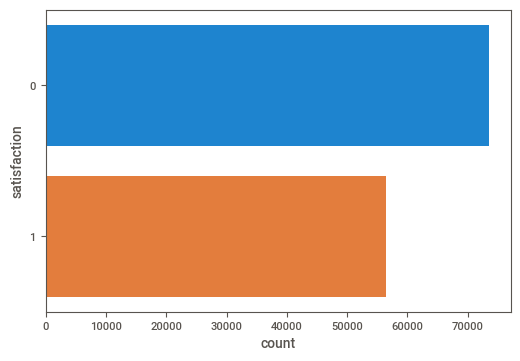

In [210]:
sns.countplot(data=data,y='satisfaction');

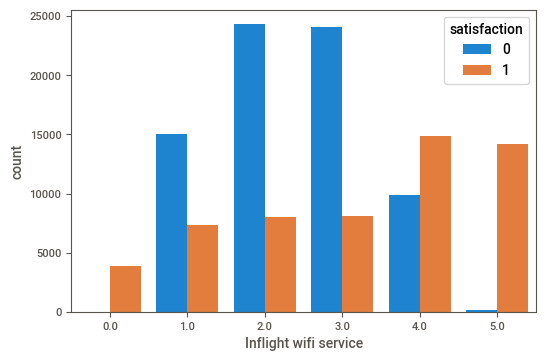

In [211]:
sns.countplot(data = data, x = 'Inflight wifi service',hue ='satisfaction');

In [212]:
data['Inflight wifi service'].value_counts()

2.0    32322
3.0    32185
4.0    24775
1.0    22327
5.0    14355
0.0     3916
Name: Inflight wifi service, dtype: int64

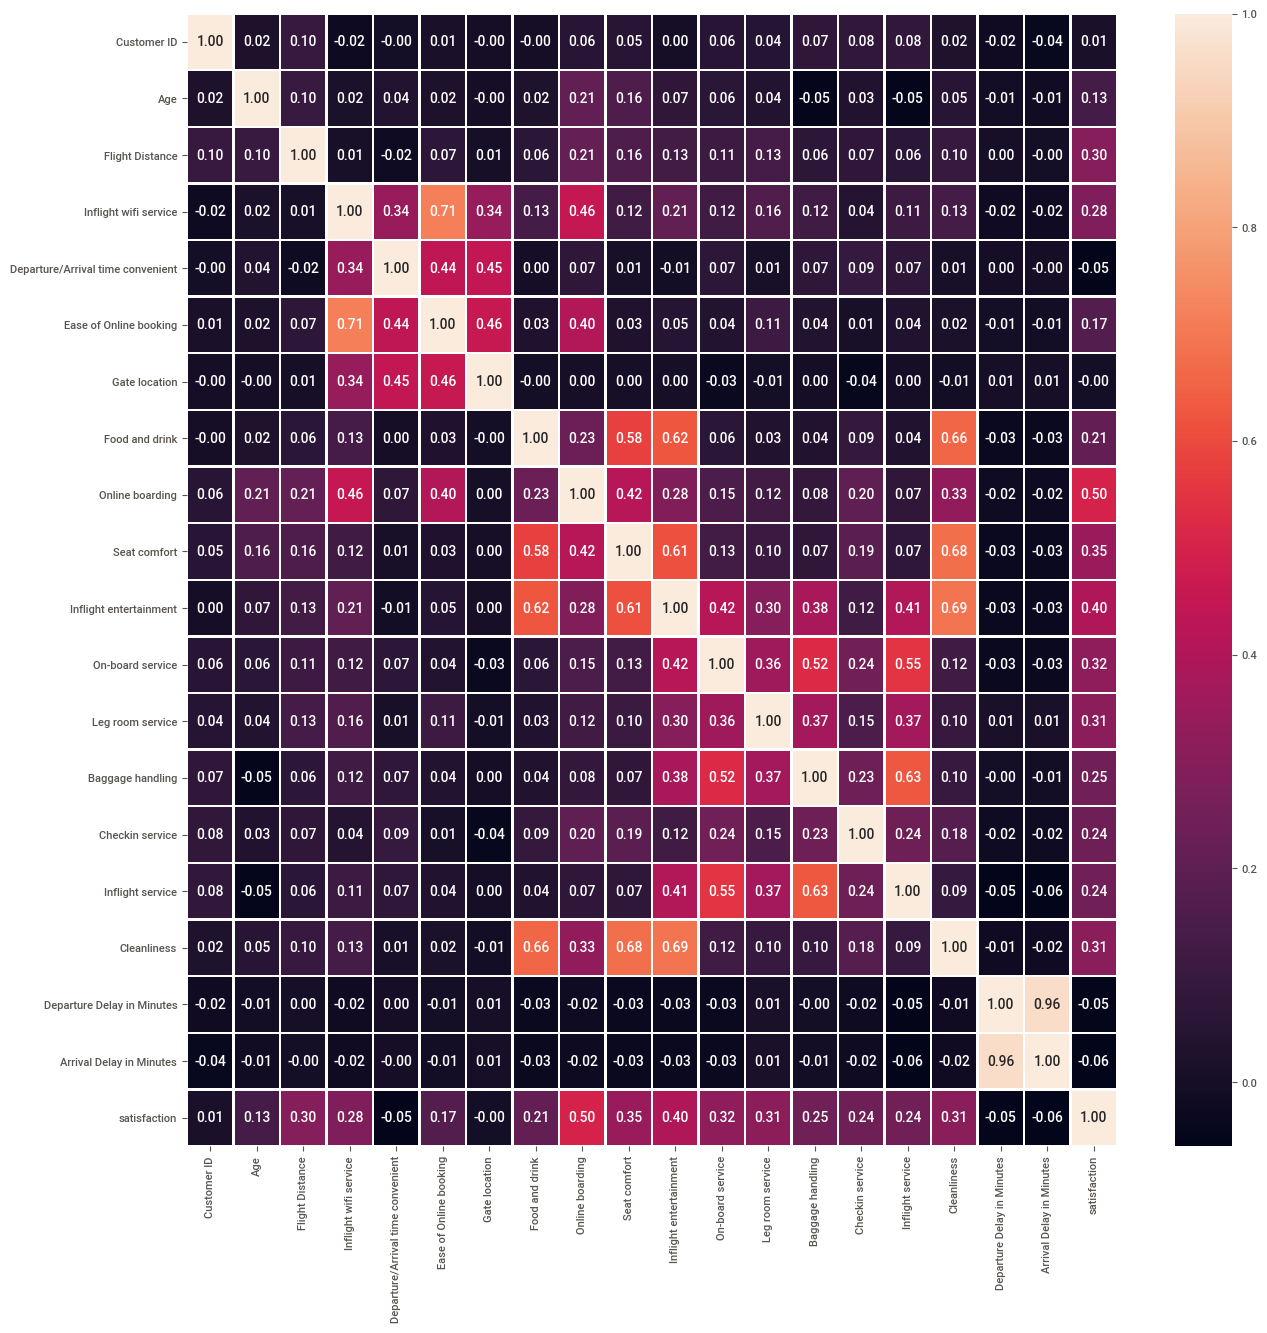

In [213]:
plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=1);

In [218]:
data.head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,-1.747961,Personal Travel,Eco Plus,-0.732184,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,0.270187,0.076909,0
1,5047,Male,disloyal Customer,-0.954274,Business travel,Business,-0.957760,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,-0.360214,-0.235460,0
2,110028,Female,Loyal Customer,-0.888133,Business travel,Business,-0.048440,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,-0.386481,-0.391644,1
3,24026,Female,Loyal Customer,-0.954274,Business travel,Business,-0.629924,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,-0.097547,-0.157368,0
4,119299,Male,Loyal Customer,1.426788,Business travel,Business,-0.978814,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,-0.386481,-0.391644,1


In [219]:
# Removing Customer ID
data.drop(columns=["Customer ID"], axis=1, inplace=True)

In [226]:
data_onehot = pd.get_dummies(data, columns=['Gender', "Customer Type", "Type of Travel", "Class"])

data_onehot.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.747961,-0.732184,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,0.270187,0.076909,0,0,1,1,0,0,1,0,0,1
1,-0.954274,-0.957760,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,-0.360214,-0.235460,0,0,1,0,1,1,0,1,0,0
2,-0.888133,-0.048440,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,-0.386481,-0.391644,1,1,0,1,0,1,0,1,0,0
3,-0.954274,-0.629924,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,-0.097547,-0.157368,0,1,0,1,0,1,0,1,0,0
4,1.426788,-0.978814,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,-0.386481,-0.391644,1,0,1,1,0,1,0,1,0,0


In [229]:
features = data_onehot.drop(columns=["satisfaction"], axis=1)
labels = data_onehot["satisfaction"]

In [243]:
x, x_test, y, y_test = train_test_split(features,labels,test_size=0.2,train_size=0.8, random_state=42, stratify=labels)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75, random_state=42, stratify=y)

# Logistic Regression

In [244]:
lr = LogisticRegression(n_jobs=100)
lr.fit(x_train,y_train)
# Here lr.score first predict the y_test and then gives the accuracy
print("test accuracy {}".format(lr.score(x_test,y_test)))

lr_score=lr.score(x_test,y_test)



test accuracy 0.8741145672928857


# Random Forest classifier without split

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, oob_score=True)
rf.fit(features, labels)
print(rf.oob_score_)

0.9630197105020019
